In [1]:
import numpy as np
import pandas as pd

### 1

Чем определяется (задаётся) доверительный интервал?

С одной стороны, доверительный интервал на то и интервал, что задаётся не центром, а границами (иначе кроме центра надо было знать ещё и ширину).

С другой стороны, важно знать и уровень значимости, так как для одной и той же случайной величины можно построить доверительный интервал с уровенем доверия 95%, а можно и 99%. Получатся два разных интервала, второй будет шире первого. 

Поэтому надо одновременно знать и границы интервала, и уровень значимости (или уровень доверия).

### 2

Чем доверительный интервал лучше точечной оценки?

Доверительный интервал проще строить — как раз наоборот, для него надо не только посчитать "среднее", но и найти нужные квантили, оценить дисперсию (в случае построения через ЦПТ). 

Доверительный интервал передаёт точность оценки параметра — по ширине интервала можно судить о точности оценки.

Точечную оценку можно построить не во всех ситуациях, где возможен доверительный интервал — точечную оценку проще строить (например, точечная оценка на среднее значения случайной величины - среднее арифметическое).

### 3

Какое значение из следующей выборки наиболее близко к 0.7-й квантили выборки?

[1, 3, 9, 2, 4, 0, 1, 5, -2, 12]

Отсортируем выборку: [-2, 0, 1, 1, 2, 3, 4, 5, 9, 12]

Под определение 0.7-квантили (больше 0.7 части объектов, то есть 7 первых чисел для нашей выборки) подходят все числа между 4 и 5. 

### 4

Давайте вспомним дискретные распределения и немного попрактикуемся с ними.

Предположим, мы обзваниваем наших клиентов и спрашиваем, будут ли они продлевать подписку на наш сервис. По нашему прошлому опыту с вероятностью p=0.3 пользователи продлевают подписку.

Посчитайте, с какой вероятностью из 10 звонков согласятся продлить подписку менее 2 пользователей (то есть 0 или 1)?

Попробуйте сделать это аналитически, то есть через формулы и калькулятор. Кстати, в формуле вероятности, которую мы рассматривали на прошлом уроке, присутствует число сочетаний из N по k, которое показывает, сколькими способами мы можем выбирать k элементов из множества N элементов (если из 10 людей 3-е продлили подписку, то это число показывает, сколько способов выбрать этих 3-х людей из 10 без учёта порядка. так как это могли быть первые трое, а могли быть 1, 5 и 7). Число сочетаний из N по k вычислить как N!/(k!(N-k)!), где k!=1*2*...*k.

**Решение**

Нам надо оценить, с какой вероятностью из 10 пользователей только 0 или 1 согласятся. Каждый пользователь соглашается с вероятностью p. Это [биномиальное](https://ru.wikipedia.org/wiki/Биномиальное_распределение) распределение, вероятность в котором можно посчитать по формуле:

$P_N(k) = \frac{N!}{k!(N-k)!} p^k (1-p)^(N-k)$

Тогда получаем:

$P(k=0) = C_{10}^0 * 0.3^0 * (1-0.3)^{10} = 1 * 1 * 0.7^{10} \approx 0.0282$

$P(k=1) = C_{10}^1 * 0.3^1 * (1-0.3)^9 = 10 * 0.3 * 0.7^9 \approx 0.1211$

Тогда искомая вероятность P = P(k=0) + P(k=1) = 0.0282 + 0.1211 ≈ 0.15

### 5

Теперь представим, что мы обзвонили 1000 клиентов и хотим проверить, с какой вероятностью 100 и меньше пользователей согласятся продлить нашу подписку.

**Решение**

Теперь мы сделаем то же самое, но с использованием готовых библиотек. 

Сначала инициализируем распределение с нужными параметрами:

In [2]:
from scipy.stats import binom

n, p = 1000, 0.3
dist = binom(n, p)

Теперь посчитаем сумму вероятностей встретить каждое значение до 100 включительно:

In [3]:
sum(dist.pmf(range(0, 100+1)))

1.718340400329605e-52

### 6

Почему при построении доверительного интервала с помощью бутстрэпа генерируют псевдовыборки из выборки?

Мы бы хотели работать с генеральной совокупностью, но у нас есть только выборка. Мы генерируем псевдовыборки из этой выборки для построение бутстрэп-распределения.

### 7

О чём говорит центральная предельная теорема?

Сумма независимых одинаково распределённых случайных величин распределена нормально с некоторыми параметрами

### 8

Предположим, что мы строим доверительный интервал, используя центральную предельную теорему. Что происходит с шириной доверительного интервала, если увеличить выборку в 4 раза?

Чем больше выборка, тем более точные выводы по ней мы можем делать. В том числе доверительный интервал становится уже. 

Можно вспомнить, что в формуле доверительного интервала через ЦПТ фигурирует корень из числа объектов выборки в знаменателе:

$$\left( \overline{X} - z_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{N}} , \overline{X} + z_{1 - \frac{\alpha}{2}} \frac{S}{\sqrt{N}} \right)$$

То есть при увеличении выборки в 4 раза интервал уменьшается в 2 раза.

### 9

Выберите из списка примеры непрерывных случайных величин?

- Наличие дождя
- Время, проведённое в приложении
- Количество выпавших осадков
- Количество проехавших мимо остановки автобусов

Количество проехавших мимо остановки автобусов измеряется в виде целого числа, наличие дождя — бинарная величина.

Количество выпавших осадков и время в приложении измеряется непрерывными числами (для любого значения можно отступить ещё небольшое число и это тоже будет валидным значением).

### 10

Что должно происходить с доверительным интервалом, если мы будем уменьшать уровень значимости и вычислять для него доверительный интервал той же случайной величины?

Уровень значимости — вероятность, с которой значение параметра не попадает в доверительный интервал. Таким образом, чтобы уровень значимости был ниже, "приходится" делать интервал шире.

### 11

Правило 2-х сигма возникло из-за того, что для 95%-го доверительного интервала (уровня значимости 0.05) выходит, что квантили стандартного нормального распределения близки к 2.

Давайте проверим, а какому доверительного интервалу соответствовало бы правило 3-х сигма?

Во-первых, посчитаем, сколько попадает в хвост "далее 3 сигма" с одной из сторон (функция распределения как раз нам показывается вероятность всех значений до аргумента):

In [4]:
from scipy.stats import norm

1 - norm.cdf(3)

0.0013498980316301035

Но нас интересуют оба хвоста — надо умножить на 2. Но нам нужна не вероятность попасть в эти хвосты, а наоборот — внутрь интервала:

In [5]:
1 - (1 - norm.cdf(3)) * 2

0.9973002039367398

Можем убедиться, что не ошиблись через правило "двух сигм". Действительно ли по нашей формуле мы получим 95-процентный доверительный интервал.

In [6]:
1 - (1 - norm.cdf(2)) * 2

0.9544997361036416

### 12

Давайте практиковаться в построении доверительных интервалов.

Для начала будем стараться строить простые интервалы «на бумаге», то есть без использования библиотек со статистическими функциями (калькулятор можно использовать).

Предположим, что мы оцениваем среднюю дневную температуру в некоторой городе. В нашей выборке 63 примера, со средним значением 25 и среднеквадратичным отклонением 7 (известно заранее, а не посчитано по выборке). Рассчитайте 95%-й доверительный интервал.

**Решение**

Так как мы знаем истинное среднеквадратичное отклонение, то можем использовать доверительный интервал для случая известной дисперсии.

In [7]:
from scipy.stats import norm

mean = 25
std = 7
N = 63

Посчитаем нужную квантиль:

In [8]:
z_alpha = norm.ppf(1-0.05/2)

Подставим в формулу доверительного интервала с лекции:

In [9]:
mean - z_alpha * std / np.sqrt(N), mean + z_alpha * std / np.sqrt(N)

(23.27147423942126, 26.72852576057874)

### 13

Предположим, что у нас есть 25 магазинов. Средняя выручка в день составляет 170 тысяч рублей, а оценённое по этой выборке среднеквадратичное отклонение составляет 12 тысяч рублей. Оцените 95%-й доверительный интервал средней выручки магазинов.

**Решение**

Теперь мы не знаем истинного значения среднеквадратичного отклонения, поэтому будем использовать формулу из случая неизвестной дисперсии с использованием распределения Стьюдента:

In [10]:
from scipy.stats import t

mean = 170
std = 12
N = 25

Аналогично вычислим квантиль и подставим в формулу:

In [11]:
t_alpha = t(N-1).ppf(1-0.05/2)

mean - t_alpha * std / np.sqrt(N), mean + t_alpha * std / np.sqrt(N)

(165.04664345209275, 174.95335654790725)

### 14

Давайте ещё попрактикуемся в построении доверительного интервала. В качестве выборки будем брать синтетические данные — сгенерируйте 1000 чисел из распределения Пуассона с параметром 50. Вам будет полезен модуль random в библиотеке numpy.

Посчитайте 95-й доверительный интервал среднего на основе центральной предельной теоремы. Какая ширина интервала у вас получилась? Среди вариантов ответа выбирайте ближайший к вашему.

**Решение**

Сгенерируем выборку:

In [12]:
data = np.random.poisson(lam=50, size=1000)

Далее будем аналогично вычислять сам интервал, но так как нам нужна его длина, то возьмём удвоенное слагаемое из каждой границы, которое показывало, на сколько мы должны отступить от среднего:

In [13]:
alpha = 0.05

mean = np.mean(data)
std = np.std(data)
N = len(data)
t_alpha2 = t.ppf(q=1-alpha/2, df=N-1)

2 * t_alpha2 * std / np.sqrt(N)

0.8692783385171217

Если же кажется, что одного вычисления длины недостаточно, ведь мы генерируем данные и каждый раз получаем новые, то можем попробовать посмотреть, а насколько сильно может меняться длина интервала:

In [14]:
diffs = []

for _ in range(10000):
    data = np.random.poisson(lam=50, size=1000)
    alpha = 0.05

    mean = np.mean(data)
    std = np.std(data)
    N = len(data)
    t_alpha2 = t.ppf(q=1-alpha/2, df=N-1)

    diffs.append(2 * t_alpha2 * std / np.sqrt(N))

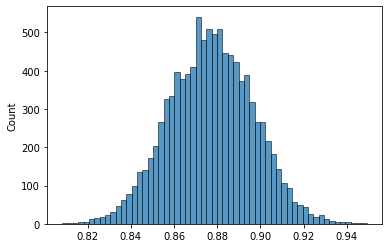

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(diffs)
plt.show()

### 15

Воспользуемся тем же набором данных (синтетическим из распределения Пуассона).

Постройте 95-й доверительный интервал на среднеквадратичное отклонение с помощью бутстрэпа. Рекомендуется попробовать сделать это вручную (генерировать бутстрапированные выборки в цикле, сохранять нужную статистику, вычислять квантили вычисленного ряда статистик) и с помощью соответствующей функции из модуля stats библиотеки scipy. Внимание, у функции bootstrap есть параметр method, который определяет, как будут вычисляться границы доверительного интервала. В нашем случае это был percentile.

**Решение**

Снова сгенерируем данные:

In [16]:
data = np.random.poisson(lam=50, size=1000)

Вызовем функцию для вычисления доверительного интервала, передадим ей нужную нам статистику, укажем уровень значимости и число семплирований.

In [17]:
from scipy.stats import bootstrap

bootstrap(
    data=(data,),
    statistic=np.std,
    confidence_level=0.95,
    n_resamples=1000,
    method='BCa',
).confidence_interval

ConfidenceInterval(low=6.651356211427388, high=7.268795229253371)

### 16

А теперь давайте воспользуемся доверительными интервалами, чтобы сделать более точные выводы о метриках модели.

Это задача предсказания средней цены в области на дом. Давайте оценим 95-процентный доверительный интервал на MSE Ridge-регрессии для этой выборки. Будем использовать бутстрэп для этого.

Для этого в цикле будем генерировать бутстрэп-выборки для обучения модели (то есть брать объекты из выборки с возвращением). В качестве тестовых объектов будем брать оставшиеся объекты. Каждый раз будем обучать модель и оценивать качество.

Реализуйте такой код для 95-процентного доверительного интервала на MSE.

**Решение**

Подготовим данные:

In [18]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

Подготовим функцию-статистику, которая:
- разбивает датасет на две части (обучающую выборку бустрапом)
- обучает модель
- оценивает качество на тестовой части

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

def my_statisctic(X, y):
    idx = np.arange(len(y))

    train_idx = np.random.choice(idx, size=idx.shape[0], replace=True)
    valid_idx = np.setdiff1d(idx, train_idx, assume_unique=False)

    boot_train_X, boot_train_y = X[train_idx], y[train_idx]
    boot_valid_X, boot_valid_y = X[valid_idx], y[valid_idx]
    
    boot_predict = Ridge().fit(boot_train_X, boot_train_y).predict(boot_valid_X)
    rmse = mean_squared_error(boot_valid_y, boot_predict) 
    
    return rmse

Теперь повторим эту процендуру 1000 раз, соберём бутстрап-распределение:

In [20]:
n_iter = 1000
stats = []

for _ in range(n_iter):
    stats.append(my_statisctic(X.values, y))

Посчитаем доверительный интервал:

In [21]:
np.quantile(stats, [0.025, 0.975])

array([0.50709444, 1.10221413])

### 17

Давайте оценим, насколько хорошие интервалы у нас получается строить.

Напишите функцию, которая генерирует случайную выборку из нормального распределения (давайте возьмём среднее значение, равное 3, среднеквадратичное отклонение, равное 4, а в выборке будет 1000 объектов).

Возьмите из предыдущих заданий код для построение соответствующего 95-процентного доверительного интервала для среднего на основе центральной предельной теоремы.

Повторите процедуру генерации выборки, построения доверительного интервала 1000 раз. Каждый раз проверяйте, действительно ли доверительный интервал покрыл ваше истинное среднее значение. 

Посчитайте долю случаев, когда интервал покрыл истинное значение. Ближе к какому значению вы получили ответ?

**Решение**

На самом деле ответ следует из определения доверительных интвервалов, но давайте убедимся в этом.

Подготовим функцию для генерации данных:

In [22]:
def get_samples(loc, scale, size=1000):
    return np.random.normal(loc=loc, scale=scale, size=size)

Подготовим функцию, которая будет вычислять доверительный интервал:

In [23]:
from scipy.stats import t

def get_ci_interval(data, alpha):
    mean = np.mean(data)
    std = np.std(data)
    N = len(data)
    t_alpha2 = t.ppf(q=1-alpha/2, df=N-1)

    return mean - t_alpha2 * std / np.sqrt(N), mean + t_alpha2 * std / np.sqrt(N)

Попробуем повторить процедуру построения доверительных интервалов 1000 раз с некоторыми настройками генерации данных, каждый раз будем проверить, а настоящее среднее значение попало в доверительный интервал или нет

In [24]:
alpha = 0.05
n_iter = 1000
mu, sigma = 3, 4
result = []

for _ in range(n_iter):
    samples = get_samples(loc=3, scale=5, size=1000)
    ci_l, ci_r = get_ci_interval(samples, alpha)
    result.append(ci_l <= mu <= ci_r)

Проверим, а сколько раз оно действительно попало

In [25]:
np.mean(result)

0.957